#PROJECT4_COVID_CSVFILE

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [63]:
data = pd.read_csv("/content/sample_data/training_data_with_weather_info_week_1[1].csv")
data.head(1)

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.0,0


In [27]:
print(data.shape)
data.isnull().sum()

(17892, 20)


,0
Id,0
Province/State,9702
Country/Region,0
Lat,0
Long,0
Date,0
ConfirmedCases,0
Fatalities,0
day_from_jan_first,0
temp,0


In [29]:
#filling null values
data.fillna(method = "ffill",inplace = True)
print(data.shape)
data.isnull().sum()

(17892, 20)


<ipython-input-29-e63f716adcd6>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method = "ffill",inplace = True)


,0
Id,0
Province/State,0
Country/Region,0
Lat,0
Long,0
Date,0
ConfirmedCases,0
Fatalities,0
day_from_jan_first,0
temp,0


#1) How do confirmed cases and fatalities vary over time for different regions?

In [38]:
#1) How do confirmed cases and fatalities vary over time for different regions?
#"Country/Region","ConfirmedCases"
df = data.groupby("Country/Region")["ConfirmedCases"].sum().reset_index()
df1 = df.head(20)
df

,Country/Region,ConfirmedCases
0,Afghanistan,363.0
1,Albania,851.0
2,Algeria,1485.0
3,Andorra,720.0
4,Antigua and Barbuda,16.0
...,...,...
158,Uruguay,833.0
159,Uzbekistan,270.0
160,Venezuela,483.0
161,Vietnam,1696.0


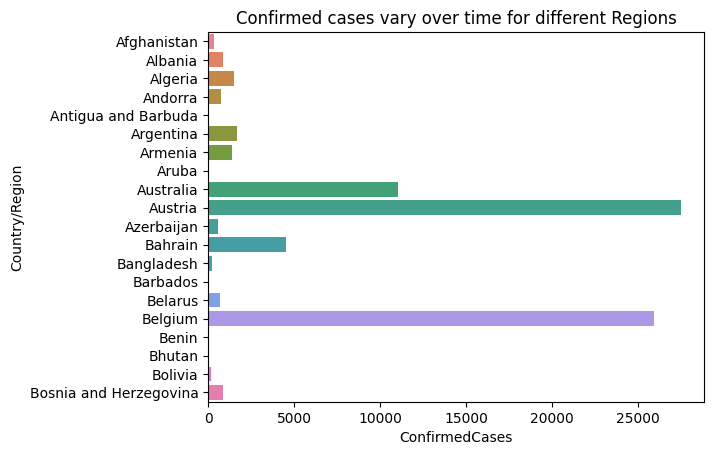

In [31]:
sn.barplot(data = df1,x = "ConfirmedCases",y = "Country/Region",hue = "Country/Region")
plt.title("Confirmed cases vary over time for different Regions")
plt.show()

In [32]:
#"Country/Region","Fatalities"

df = data.groupby("Country/Region")["Fatalities"].sum().reset_index()
df1 = df.head(20)
df

,Country/Region,Fatalities
0,Afghanistan,3.0
1,Albania,26.0
2,Algeria,113.0
3,Andorra,3.0
4,Antigua and Barbuda,0.0
...,...,...
158,Uruguay,0.0
159,Uzbekistan,0.0
160,Venezuela,0.0
161,Vietnam,0.0


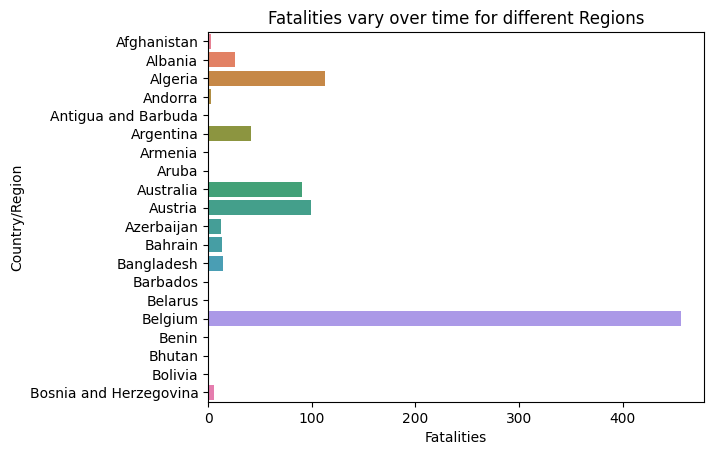

In [ ]:
sn.barplot(data = df1,x = "Fatalities",y = "Country/Region",hue = "Country/Region")
plt.title("Fatalities vary over time for different Regions")
plt.show()

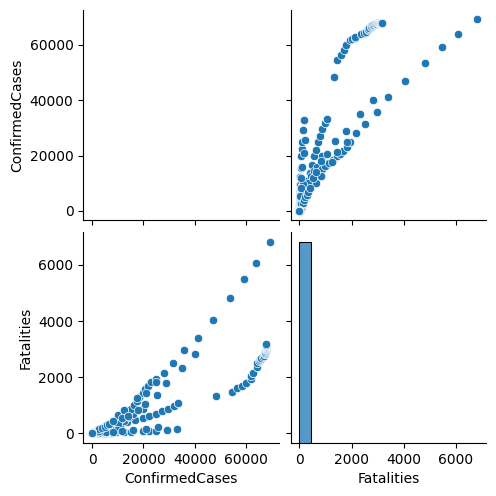

In [ ]:
sn.pairplot(data[["Country/Region","ConfirmedCases","Fatalities"]])
plt.show()

#2) Which countries or regions have the highest and lowest total confirmed cases and fatalities?


In [61]:
#2) Which countries or regions have the highest and lowest total confirmed cases and fatalities?
#-->a)"Country/Region","ConfirmedCases"
df = data[["Country/Region","ConfirmedCases"]].value_counts().reset_index()
df1 = df.head(15)
df

,Country/Region,ConfirmedCases,count
0,Afghanistan,0.0,1
1,North Macedonia,1.0,1
2,Nigeria,1.0,1
3,Nigeria,2.0,1
4,Nigeria,3.0,1
...,...,...,...
3296,Cote d'Ivoire,6.0,1
3297,Cote d'Ivoire,9.0,1
3298,Cote d'Ivoire,14.0,1
3299,Cote d'Ivoire,25.0,1


In [57]:
data = df[['Country/Region','ConfirmedCases','count']]
sorted = data.sort_values("ConfirmedCases",ascending = True)

# Find the highest and lowest confirmed cases
highest = sorted.iloc[0]
lowest = sorted.iloc[-1]

print(f"{highest['Country/Region']} country has confirmed highest cases of {highest['ConfirmedCases']} with {highest['count']} count")
print(f"{lowest['Country/Region']} country has confirmed lowest cases of {highest['ConfirmedCases']} with  {lowest['count']} count")


US country has confirmed highest cases of 0.0 with 2868 count
Italy country has confirmed lowest cases of 0.0 with  1 count


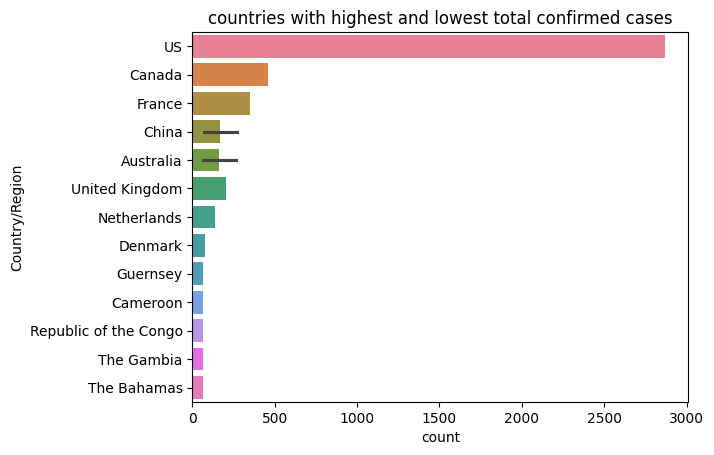

In [59]:
sn.barplot(data = df1,x = "count",y = "Country/Region",hue = "Country/Region")
plt.title("countries with highest and lowest total confirmed cases")
plt.show()

In [64]:
#--b)"Country/Region","Fatalities"
df = data[["Country/Region","Fatalities"]].value_counts().reset_index()
df2 = df.head(15)
df

,Country/Region,Fatalities,count
0,US,0.0,3363
1,China,0.0,1009
2,Canada,0.0,658
3,Australia,0.0,522
4,France,0.0,464
...,...,...,...
801,Iran,1934.0,1
802,Iran,1812.0,1
803,Iran,1685.0,1
804,Iran,1556.0,1


In [65]:
sorted = df.sort_values(by = "Fatalities",ascending = False)

#finding highest and lowest fatalities
highest = df.iloc[0]
lowest = df.iloc[-1]

print(f"{highest['Country/Region']} country has confirmed highest fatalities of {highest['Fatalities']} with {highest['count']} count")
print(f"{lowest['Country/Region']} country has confirmed lowest fatalities of {lowest['Fatalities']} with {lowest['count']} count")

US country has confirmed highest fatalities of 0.0 with 3363 count
Italy country has confirmed lowest fatalities of 52.0 with 1 count


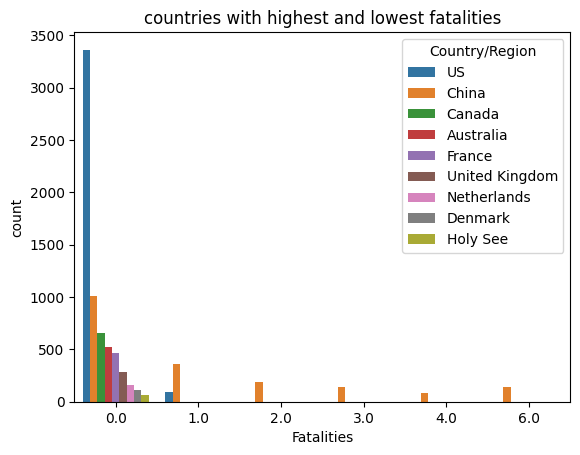

In [66]:
sn.barplot(data = df2,x = 'Fatalities',y = "count",hue = "Country/Region")
plt.title("countries with highest and lowest fatalities")
plt.show()

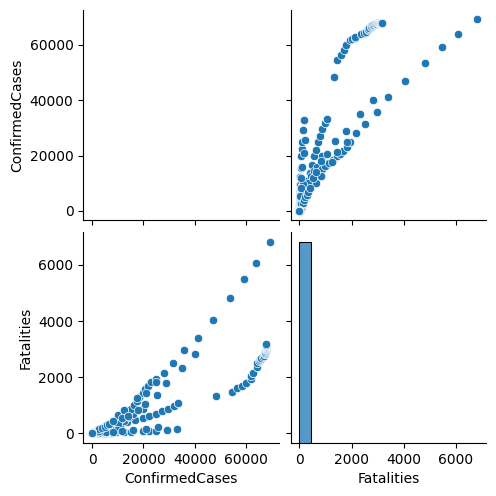

In [16]:
sn.pairplot(data[["Country/Region","ConfirmedCases","Fatalities"]])
plt.show()

#3) Is there a correlation between temperature (temp) and the number of confirmed cases or fatalities?

In [17]:
#3) Is there a correlation between temperature (temp) and the number of confirmed cases or fatalities?
#-->a)"temp","ConfirmedCases"

corr = data[["temp","ConfirmedCases"]].corr()
corr

,temp,ConfirmedCases
temp,1.000000,-0.011405
ConfirmedCases,-0.011405,1.000000


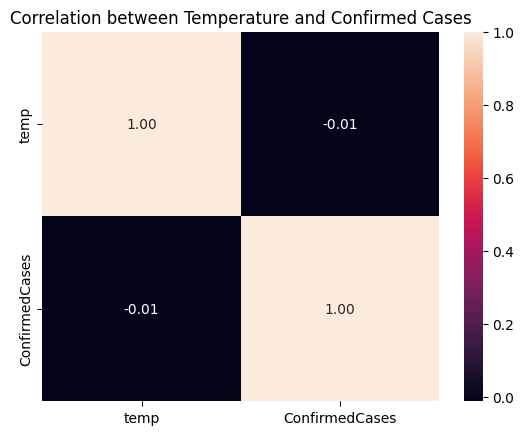

In [18]:
sn.heatmap(data = corr,annot = True,fmt = "1.2f")
plt.title("Correlation between Temperature and Confirmed Cases")
plt.show()

In [19]:
#-->b)"temp","Fatalities"
corr = data[["temp","Fatalities"]].corr()
corr

,temp,Fatalities
temp,1.000000,-0.005023
Fatalities,-0.005023,1.000000


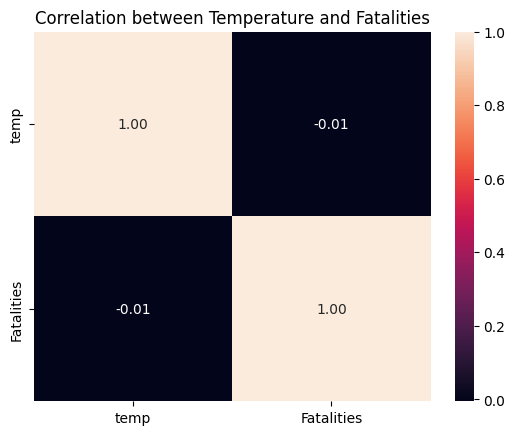

In [20]:
sn.heatmap(data = corr,annot = True,fmt = "1.2f")
plt.title("Correlation between Temperature and Fatalities")
plt.show()

In [21]:
#correlation between temperature with confirmed cases and fatalities
corr = data[["temp","ConfirmedCases","Fatalities"]].corr()
corr

,temp,ConfirmedCases,Fatalities
temp,1.000000,-0.011405,-0.005023
ConfirmedCases,-0.011405,1.000000,0.927719
Fatalities,-0.005023,0.927719,1.000000


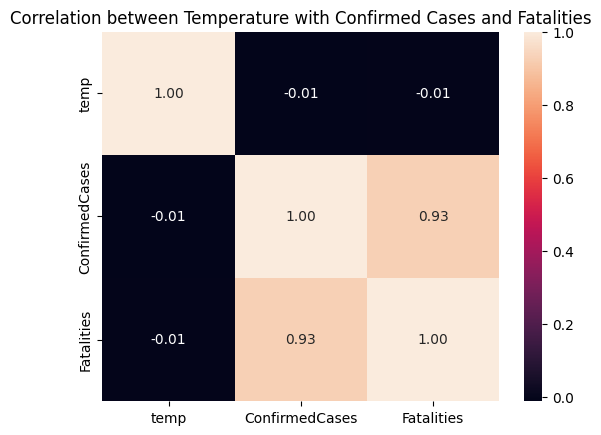

In [22]:
#correlation between temperature with confirmed cases and fatalities
sn.heatmap(corr[["temp","ConfirmedCases","Fatalities"]],annot = True,fmt = "1.2f")
plt.title("Correlation between Temperature with Confirmed Cases and Fatalities")
plt.show()